In [1]:
!pip install yfinance

In [14]:
# import necessary packages
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

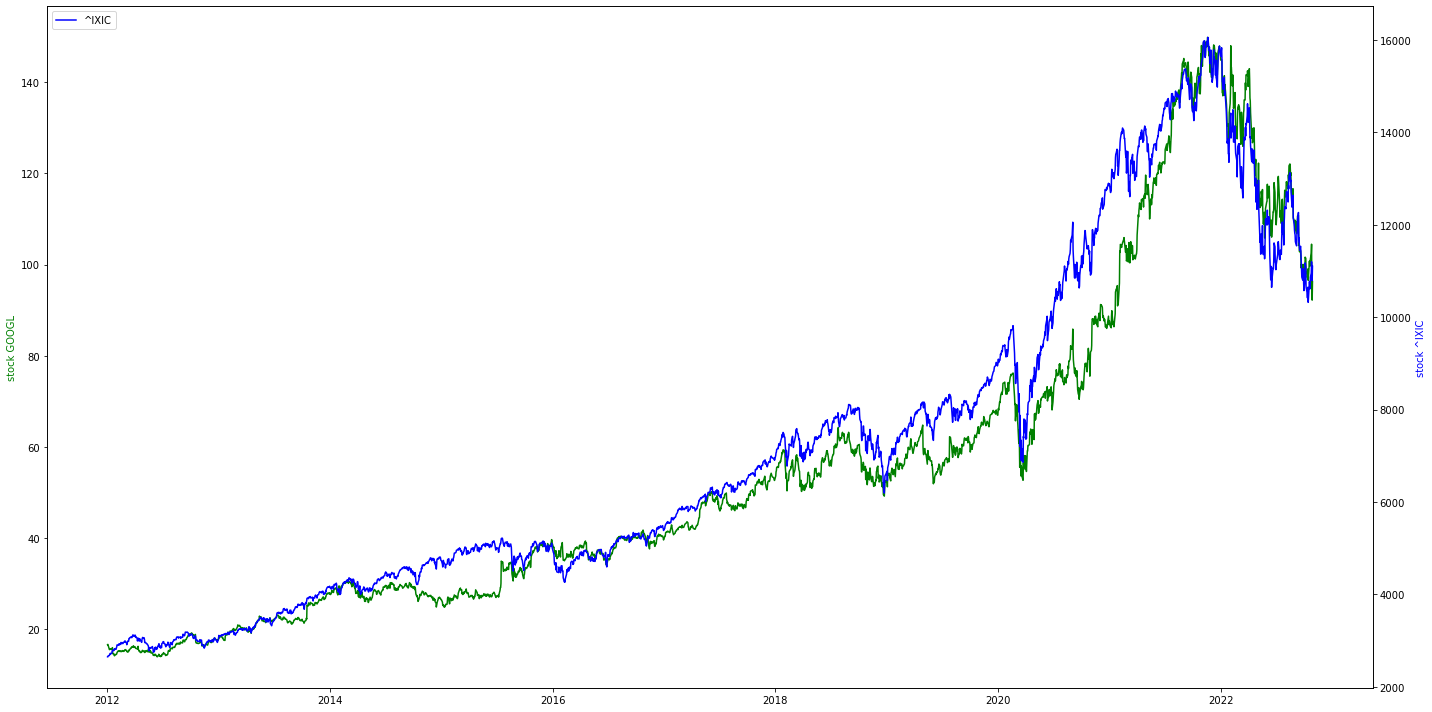

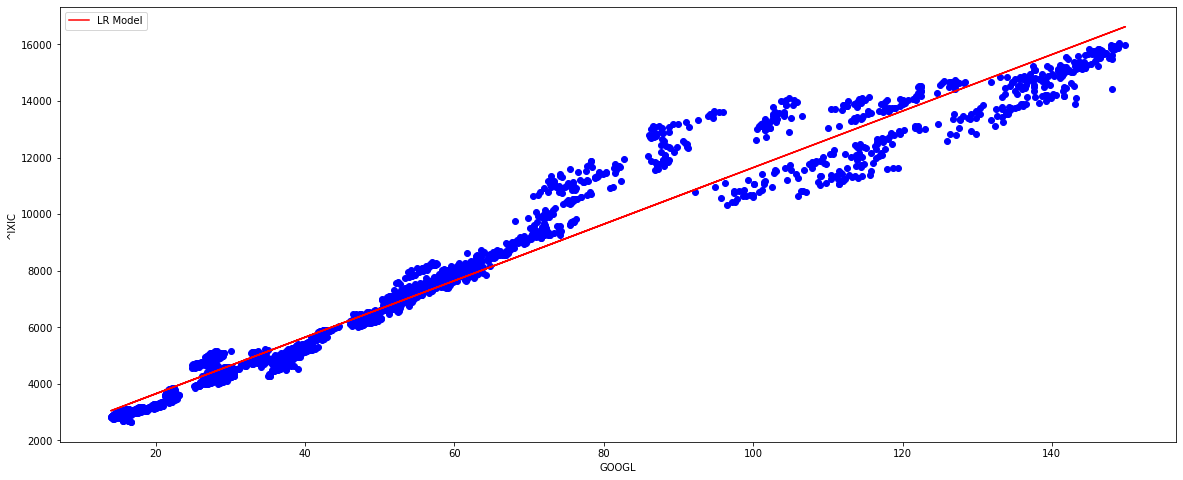

In [15]:
# get data by ticker, and time range
    # return date-time & close-points
def get_date_close(ticker_name, start_date, end_date):
    df_data = yf.Ticker(ticker_name) # , 
        # get historical market data
    df_data = df_data.history(start=start_date, end=end_date )
    x_axis = list( df_data.index )
    y_axis = list( df_data['Close'] )
    return x_axis, y_axis

# draw 2 stocks, they have different y-axis, but the same x-axis
def draw_2_stocks_independently(ticker_names, start_date, end_date):
    fig, ax = plt.subplots(figsize = (20, 10)) # ax is for 1st stock
    ax2 = ax.twinx() # ax2 is for 2nd stock
    # 1st stock, draw its graph
    x1_axis, y1_axis = get_date_close(ticker_names[0], start_date, end_date)
    ax.plot(x1_axis, y1_axis, color = 'g', label=ticker_names[0])
    ax.set_ylabel('stock '+ticker_names[0], color = 'g')
    # 2nd stock, draw its graph
    x2_axis, y2_axis = get_date_close(ticker_names[1], start_date, end_date)
    ax2.plot(x2_axis, y2_axis, color = 'b', label=ticker_names[1])
    ax2.set_ylabel('stock '+ticker_names[1], color = 'b')    
    #
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    return x1_axis, y1_axis, x2_axis, y2_axis

# linear regression model to fit the relationship between 2 datasets
def LR_model_fitting(x, y):
  X_data = np.array(x)
  y_data = np.array(y)
  X_data = X_data.reshape(-1, 1)
  y_data = y_data.reshape(-1, 1)

  reg = LinearRegression().fit(X_data, y_data)
  k, b = reg.coef_, reg.intercept_
  k, b = k.reshape(1), b.reshape(1)
  k, b = k[0], b[0]
  #print(k, b)
  x_axis = x
  z_axis = []
  for v in x_axis:
    z_axis.append( k*v+b )
  return x_axis, z_axis

# when 2 stocks are from 2 different stock-markets, such as one from US and another from HK, 
    # at this time, it is necessary to get overlap time-range
def overlap_data(x1, y1, x2, y2):
    dic1, dic2 = {}, {}
    ii = 0
    while ii<len(x1):
        dic1[x1[ii].strftime("%m/%d/%Y, %H:%M:%S")] = y1[ii]
        ii += 1
    ii = 0
    while ii<len(x2):
        dic2[x2[ii].strftime("%m/%d/%Y, %H:%M:%S")] = y2[ii]
        ii += 1
    ny1, ny2 = [], []
    for k in dic1.keys():
        if k in dic2:
            ny1.append( dic1[k] )
            ny2.append( dic2[k] )
    return ny1, ny2

# draw 2 stocks, one is x-axis, another is y-axis
def draw_2_stocks_dependently(ticker_names, x1_axis, y1_axis, x2_axis, y2_axis):
    y1, y2 = y1_axis, y2_axis
    if len(y1_axis)!=len(y2_axis):
        print('find overlap datetime') # for 2 stocks from different stock-markets, for example, one from US, another form HK
        y1, y2 = overlap_data(x1_axis, y1_axis, x2_axis, y2_axis) 
    x_axis, z_axis = LR_model_fitting(y1, y2)
    plt.figure(figsize=(20, 8))
    plt.xlabel(ticker_names[0])
    plt.ylabel(ticker_names[1])
    plt.scatter(y1, y2, c ="b")
    plt.plot(x_axis, z_axis, color='r', label='LR Model')
    plt.legend(loc='upper left')
    plt.show()
    return 

###
ticker_names = ['GOOGL', '^IXIC'] # AMZN AAPL "^IXIC", "^DJI", "^HSI", "000001.SS" ^GSPC GOOGL
start_date, end_date = "2012-01-01", "2022-12-31"
x1_axis, y1_axis, x2_axis, y2_axis = draw_2_stocks_independently(ticker_names, start_date, end_date)
draw_2_stocks_dependently(ticker_names, x1_axis, y1_axis, x2_axis, y2_axis)